### **Group-11**
- Dharmik Patel    : 0813537 
- Manav Patel      : 0804383
- Mayur Parmar     : 0811597
- Deep Chaudhari   : 0813502
- Nimesh Prajapati : 0816765

### **Objective:** 
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, data manupilation

# visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.subplots as sp 
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

1.2. Display the top 10 rows of the dataframe:

In [2]:
data = pd.read_csv("Sales_data.csv", encoding = 'unicode_escape')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [6]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [9]:
print("\nUnique Values: \n", data['StockCode'].nunique())


Unique Values: 
 4070


In [10]:
print("\nUnique Values: \n", data['StockCode'].unique())


Unique Values: 
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']


2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [11]:
top_10_products = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 products (by StockCode) sold by quantity:")
print(top_10_products)

Top 10 products (by StockCode) sold by quantity:
StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64


2.3. How many unique customers are there in the dataset?



In [12]:
unique_customers_count = data['CustomerID'].nunique()
print("Number of unique customers:", unique_customers_count)

Number of unique customers: 4372


2.4. Which country has the maximum number of unique customers?



In [13]:
unique_customers_by_country = data.groupby('Country')['CustomerID'].nunique()
country_with_max_customers = unique_customers_by_country.idxmax()
print("Country with the maximum number of unique customers:", country_with_max_customers)

Country with the maximum number of unique customers: United Kingdom


2.5. Visualize the distribution of 'TotalPrice' using a histogram.



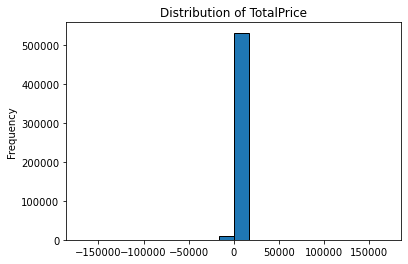

In [14]:
plt.hist(data['TotalPrice'], bins=20, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Distribution of TotalPrice')
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [15]:
df = data.groupby('Country')['TotalPrice'].sum()
print("Total sales (TotalPrice) per country:")
print(df)

Total sales (TotalPrice) per country:
Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland            

3.2. Identify the month in which the sales were highest.



In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
monthly_total_sales = data.groupby('Month')['TotalPrice'].sum()
month_with_highest_sales = monthly_total_sales.idxmax()
print("Month with the highest sales:", month_with_highest_sales)

Month with the highest sales: 11


3.3. Compute the average unit price per product.



In [17]:
df1 = data.groupby('StockCode')['UnitPrice'].mean()

print("Average unit price per product:")
print(df1)

Average unit price per product:
StockCode
10002            1.056849
10080            0.376667
10120            0.210000
10123C           0.487500
10123G           0.000000
                  ...    
gift_0001_20    15.038000
gift_0001_30    21.941250
gift_0001_40    33.566667
gift_0001_50    41.890000
m                2.550000
Name: UnitPrice, Length: 4070, dtype: float64


3.4. Compute the total quantity sold per customer.



In [18]:
df2 = data.groupby('CustomerID')['Quantity'].sum()
print("Total quantity sold per customer:")
print(df2)

Total quantity sold per customer:
CustomerID
12346.0       0
12347.0    2458
12348.0    2341
12349.0     631
12350.0     197
           ... 
18280.0      45
18281.0      54
18282.0      98
18283.0    1397
18287.0    1586
Name: Quantity, Length: 4372, dtype: int64


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



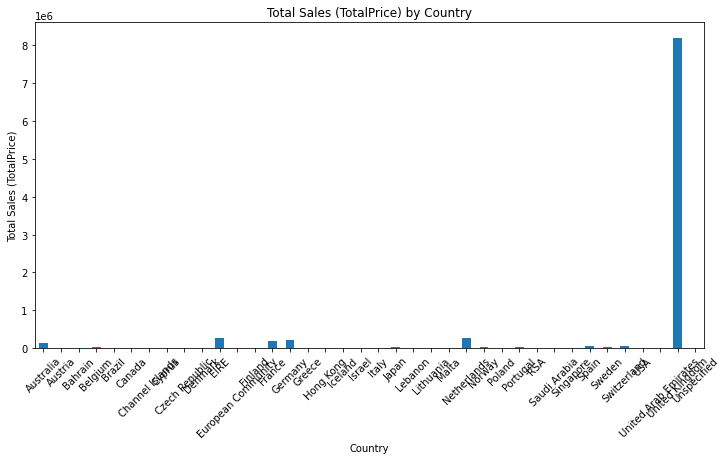

In [19]:
plt.figure(figsize=(12, 6))
df.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Total Sales (TotalPrice) by Country')
plt.xticks(rotation=45)
plt.show()

4.2. Plot a line graph to showcase the trend of sales over time.



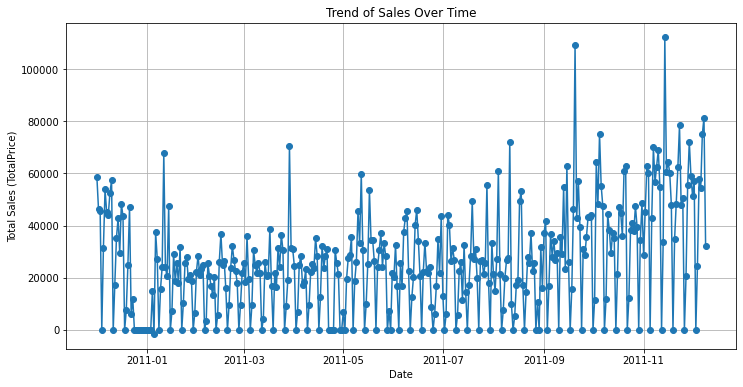

In [20]:
daily_total_sales = data.resample('D', on='InvoiceDate').agg({'TotalPrice': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(daily_total_sales.index, daily_total_sales['TotalPrice'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Trend of Sales Over Time')
plt.grid(True)
plt.show()

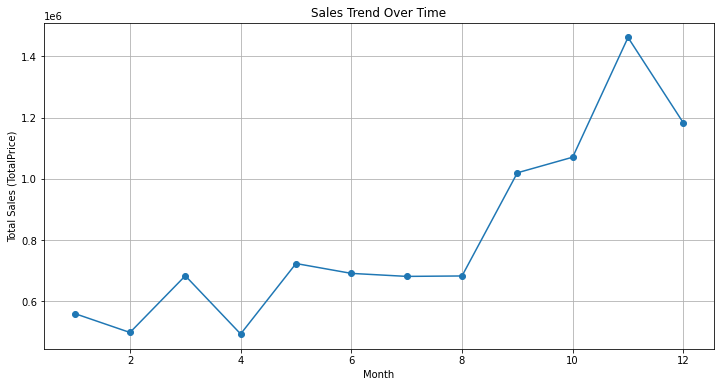

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_sales.index, monthly_total_sales.values, marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (TotalPrice)')
plt.grid(True)
plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



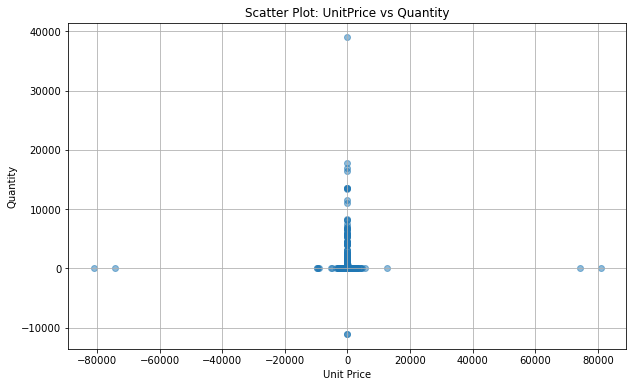

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['UnitPrice'], alpha=0.5)
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot: UnitPrice vs Quantity')
plt.grid(True)
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



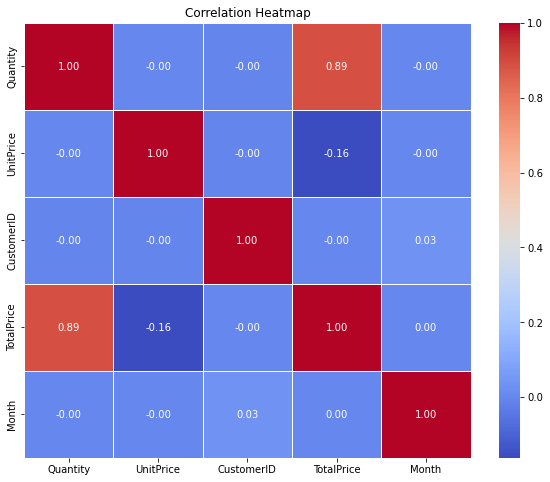

In [23]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



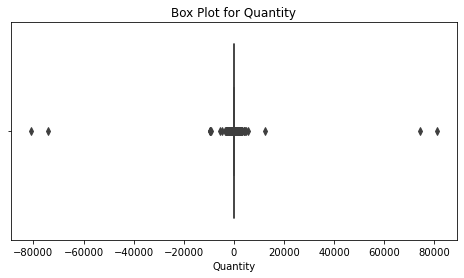

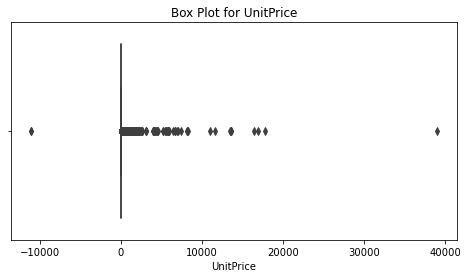

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Quantity'])
plt.title('Box Plot for Quantity')
plt.show()
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['UnitPrice'])
plt.title('Box Plot for UnitPrice')
plt.show()

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



In [25]:
import pandas as pd

# Assuming df is your DataFrame
data['TotalPurchase'] = data['Quantity'] * data['UnitPrice']
df_new = data.select_dtypes(include='number')

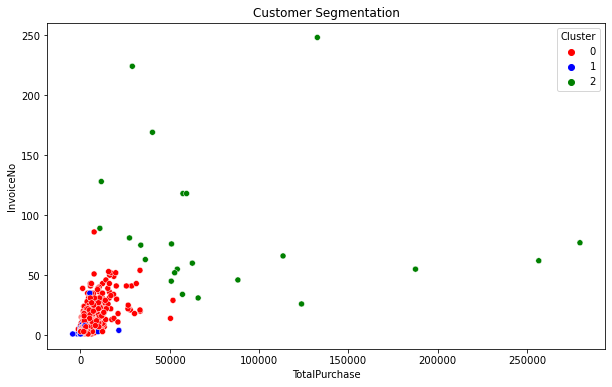

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df_new['TotalPurchase'] = df_new['Quantity'] * df_new['UnitPrice']

# Calculate Recency
max_date = data['InvoiceDate'].max()
data['Recency'] = (max_date - data.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Aggregate customer-level features
customer_data = data.groupby('CustomerID').agg({
    'TotalPurchase': 'sum',
    'InvoiceNo': 'nunique',  
    'Recency': 'min'  
}).reset_index()

# Standardize the features
scaler = StandardScaler()
Z = customer_data[['TotalPurchase', 'InvoiceNo', 'Recency']]
X_scaled = scaler.fit_transform(Z)

# Perform K-Means clustering
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}  

# Set the figure size
plt.figure(figsize=(10, 6)) 

# Visualize the clusters with custom colors and figure size
sns.scatterplot(x='TotalPurchase', y='InvoiceNo', hue='Cluster', data=customer_data, palette=cluster_colors)
plt.title('Customer Segmentation')
plt.show()

5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



In [27]:
# Get the top 5 products by quantity sold
top_products = data.groupby('StockCode')['Quantity'].sum().nlargest(5).index
top_products

Index(['22197', '84077', '85099B', '85123A', '84879'], dtype='object', name='StockCode')

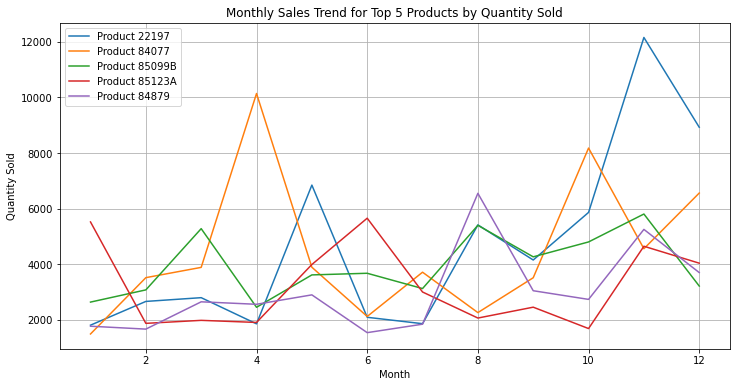

In [28]:
# Filter the data for the top 5 products
top_products_data = data[data['StockCode'].isin(top_products)]

# Create a line graph for sales trend of top 5 products
plt.figure(figsize=(12, 6))
for product in top_products:
    product_data = top_products_data[top_products_data['StockCode'] == product]
    monthly_sales = product_data.groupby('Month')['Quantity'].sum()
    plt.plot(monthly_sales.index, monthly_sales.values, label=f'Product {product}')

plt.title('Monthly Sales Trend for Top 5 Products by Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract 'Year', 'Month', 'Day', and 'Hour' into separate columns
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

# Display the updated DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,TotalPurchase,Recency,Year,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,15.30,301.0,2010,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,22.00,301.0,2010,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8


6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [30]:
data['ReturnFlag'] = data['Quantity'].apply(lambda x: 1 if x < 0 else 0)

# Display the updated DataFrame
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Month  TotalPurchase  Recency  Year  Day  Hour  ReturnFlag  
0     12          15.30    301.0  2010    1   

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [31]:
# Calculate Recency, Frequency and Monetary for each customer
current_date = data['InvoiceDate'].max()

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                   # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


7.2. Normalize the RFM matrix with StandardScaler:

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)
rfm_normalized

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

In [33]:
!pip install -U threadpoolctl

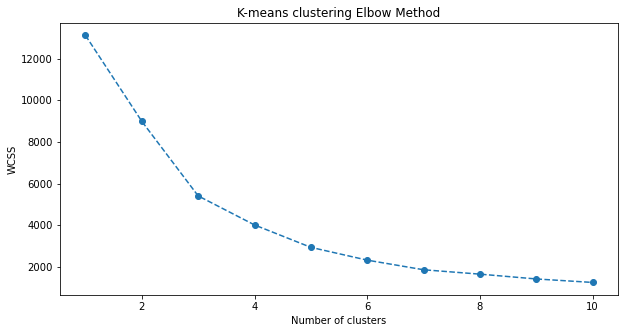

In [34]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering Elbow Method')
plt.show()

# Based on the elbow point, choose optimal clusters and run KMeans
optimal_clusters = 3  # this can change based on your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

rfm['Cluster'] = clusters

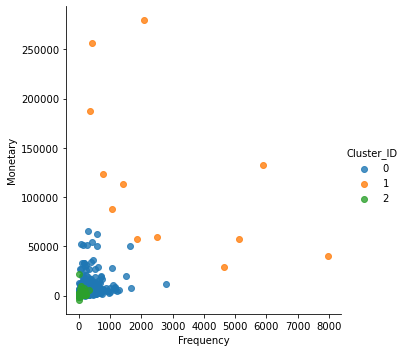

In [35]:
from sklearn.cluster import KMeans

# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(rfm_normalized)
rfm['Cluster_ID'] = y_kmeans
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = data[['UnitPrice', 'Quantity']] 
target = data['ReturnFlag']

for col in ['InvoiceDate', 'InvoiceNo','StockCode', 'Description', 'Country', 'CustomerID']:
    if col in features.columns:  
        del features[col]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106226
           1       1.00      1.00      1.00      2156

    accuracy                           1.00    108382
   macro avg       1.00      1.00      1.00    108382
weighted avg       1.00      1.00      1.00    108382



In [37]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,TotalPurchase,Recency,Year,Day,Hour,ReturnFlag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,15.30,301.0,2010,1,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,22.00,301.0,2010,1,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,20.34,301.0,2010,1,8,0


8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
features = ['UnitPrice', 'Quantity'] 
X = df_new[features]
y = df_new['TotalPrice']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2): {r2}')

Mean Absolute Error (MAE): 17.433449317229787
Root Mean Squared Error (RMSE): 224.6022215979858
R-squared (R^2): 0.8463479278316323


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [39]:
! pip install mlxtend --q

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

# Creating a basket
basket = (data.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

# Build frequent items
frequent_itemsets = apriori(basket_encoded, min_support=0.03, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/Users/dharmik/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041520,0.043606,0.031416,0.756650,17.351850,0.029606,3.930120,0.983191
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043606,0.041520,0.031416,0.720450,17.351850,0.029606,3.428656,0.985336
2,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.085576,0.049824,0.033748,0.394359,7.915034,0.029484,1.568878,0.955419
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.049824,0.085576,0.033748,0.677340,7.915034,0.029484,2.834015,0.919470


# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [41]:
# Calculate the contribution of each product to the total revenue
product_revenue = data.groupby('StockCode')['TotalPrice'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='TotalPrice', ascending=False)

# Calculate the cumulative percentage of revenue
product_revenue['CumulativePercentage'] = product_revenue['TotalPrice'].cumsum() / product_revenue['TotalPrice'].sum()

# Find the stock codes that make up the top 20% of products
top_products = product_revenue[product_revenue['CumulativePercentage'] <= 0.20]

# Calculate the total revenue generated by the top products
revenue_from_top_products = top_products['TotalPrice'].sum()

# Print the top products and the total revenue they generate
print(top_products)
print(f'Total revenue from top 20% of products: {revenue_from_top_products:.2f}')


     StockCode  TotalPrice  CumulativePercentage
4059       DOT   206245.48              0.021158
1348     22423   164762.19              0.038061
2733     47566    98302.98              0.048146
3536    85123A    97894.50              0.058188
3515    85099B    92356.03              0.067663
1982     23084    66756.59              0.074511
4062      POST    66230.64              0.081306
1043     22086    63791.94              0.087850
3305     84879    58959.73              0.093899
2924     79321    53768.06              0.099415
1422     22502    51041.37              0.104651
1147     22197    50987.47              0.109881
2179     23298    42700.02              0.114262
1317     22386    41619.66              0.118532
2096     23203    40991.38              0.122737
404      21137    40596.96              0.126902
1631     22720    37413.44              0.130740
2165     23284    36565.39              0.134491
1862     22960    36116.09              0.138196
2954     82484    35

12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

In [42]:
# Calculate the contribution of each customer to the total sales
customer_sales = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_sales = customer_sales.sort_values(by='TotalPrice', ascending=False)

# Calculate the cumulative percentage of sales
customer_sales['CumulativePercentage'] = customer_sales['TotalPrice'].cumsum() / customer_sales['TotalPrice'].sum()

# Find the customer IDs that make up the top 20% of customers
top_customers = customer_sales[customer_sales['CumulativePercentage'] <= 0.20]

# Calculate the total sales generated by the top customers
sales_from_top_customers = top_customers['TotalPrice'].sum()

# Print the top customers and the total sales they generate
print(top_customers)
print(f'Total sales from top 20% of customers: {sales_from_top_customers:.2f}')


      CustomerID  TotalPrice  CumulativePercentage
1703     14646.0   279489.02              0.033673
4233     18102.0   256438.49              0.064569
3758     17450.0   187482.17              0.087157
1895     14911.0   132572.62              0.103130
55       12415.0   123725.45              0.118036
1345     14156.0   113384.14              0.131697
3801     17511.0    88125.38              0.142314
3202     16684.0    65892.08              0.150253
1005     13694.0    62653.10              0.157801
2192     15311.0    59419.34              0.164960
568      13089.0    57385.88              0.171874
1300     14096.0    57120.91              0.178756
1999     15061.0    54228.74              0.185290
4125     17949.0    52750.84              0.191645
2537     15769.0    51823.72              0.197889
Total sales from top 20% of customers: 1642491.88


# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

<AxesSubplot:xlabel='support', ylabel='confidence'>

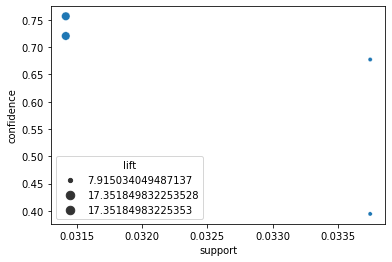

In [43]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
top_rules = rules[rules['confidence'] > 0.01]
sns.scatterplot(x='support', y='confidence', size='lift', data=top_rules)

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-product matrix
user_product_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
reindexed_user_product_matrix = user_product_matrix.reset_index()
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(user_product_matrix)

# Get product recommendations for a user based on their purchase history
def get_recommendations(user_id, cosine_sim=cosine_sim):
    idx = reindexed_user_product_matrix[reindexed_user_product_matrix['CustomerID']==user_id].index[0]        
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort users based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get products bought by the most similar user
    user_idx = sim_scores[1][0]
    similar_user_products = user_product_matrix.iloc[user_idx]
    recommended_products = similar_user_products[similar_user_products > 0].index.tolist()
    
    return recommended_products

stockcodelist = get_recommendations(13113.0) # Replace 2154 with an actual CustomerID
print(f"Stockcode list for recommended products are - {stockcodelist}")

Stockcode list for recommended products are - ['22087', '22668', '47566', '47566B']


## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# For this example, let's assume if a customer hasn't purchased in the last 6 months, they've churned
data['LastPurchase'] = data.groupby('CustomerID')['InvoiceDate'].transform('max')
max_date = data['InvoiceDate'].max()
data['Churn'] = (max_date - data['LastPurchase']).dt.days > 180

X = data[['TotalPrice', 'Quantity']] # Add more relevant features
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98    155993
        True       0.00      0.00      0.00      6580

    accuracy                           0.96    162573
   macro avg       0.48      0.50      0.49    162573
weighted avg       0.92      0.96      0.94    162573



## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   0.6s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   0.7s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   0.7s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   0.8s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   0.7s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.960 total time=   0.6s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.960 total time=   0.6s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.960 total time=   0.6s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.960 total time=   0.6s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.960 total time=   0.5s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.960 total time=   0.5s
[CV 2/5] END ..................C=10, penalty=l2;,